In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 14,6

In [2]:
df = pd.read_csv('prep_loan.csv', low_memory=False)

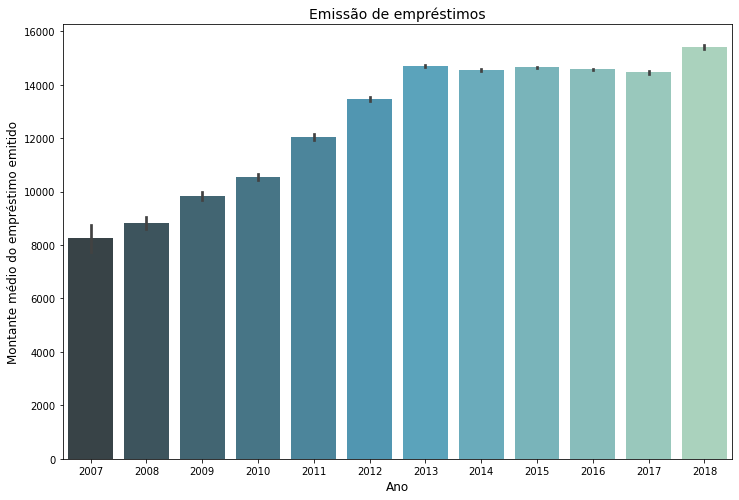

In [3]:
df['issue_month'], df['issue_year'] = df['issue_d'].str.split('-', 1).str
plt.figure(figsize=(12,8))
sns.barplot('issue_year', 'loan_amnt', data=df, palette="GnBu_d")
plt.title('Emissão de empréstimos', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Montante médio do empréstimo emitido', fontsize=12)
plt.show()

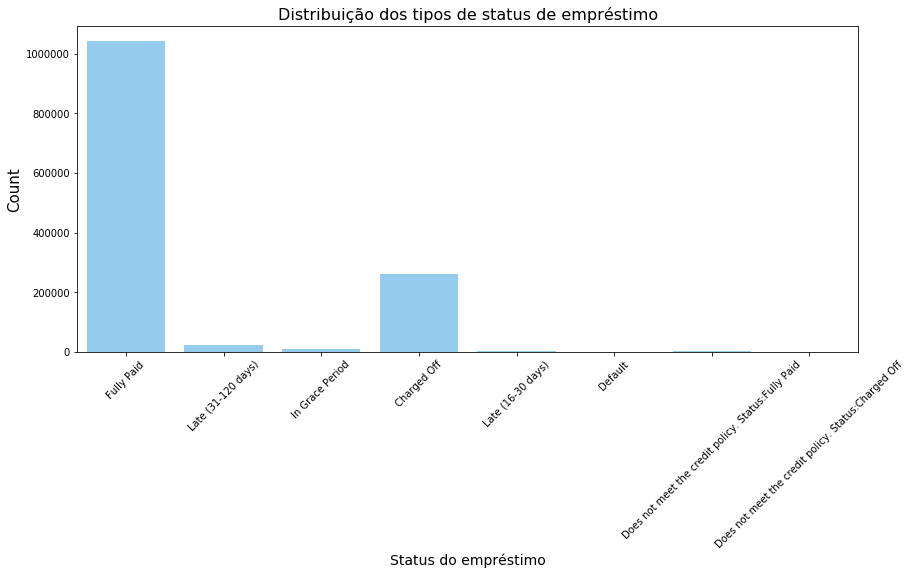

In [4]:
plt.figure(figsize = (14,6))
sns.countplot(x="loan_status", data=df, color='lightskyblue')
plt.xticks(rotation=45)
plt.xlabel("Status do empréstimo", fontsize=14)
plt.ylabel("Count", fontsize=15)
plt.title("Distribuição dos tipos de status de empréstimo", fontsize=16)
plt.show()

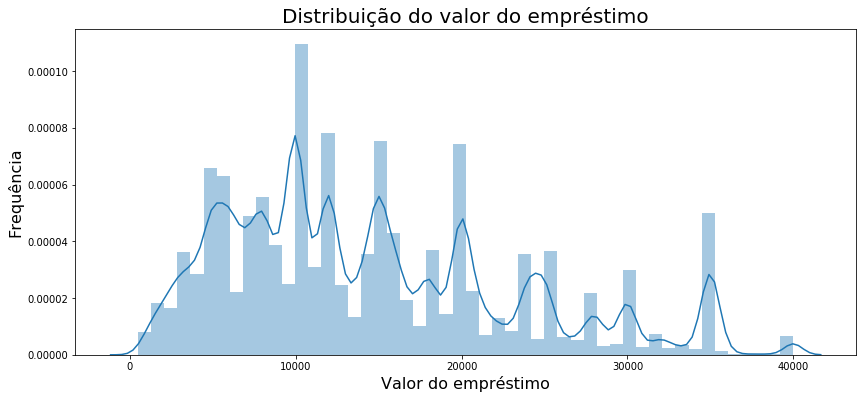

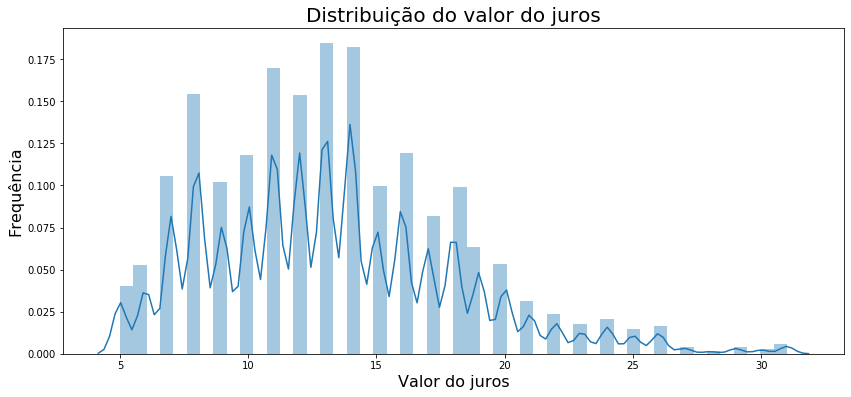

In [5]:
plt.figure(figsize=(14,6))
sns.distplot(df["loan_amnt"])
plt.xlabel("Valor do empréstimo", fontsize=16)
plt.ylabel("Frequência", fontsize=16)
plt.title("Distribuição do valor do empréstimo", fontsize=20)
plt.show()

plt.figure(figsize=(14,6))
df['int_round'] = df['int_rate'].round(0).astype(int)
sns.distplot(df["int_round"])
plt.xlabel("Valor do juros", fontsize=16)
plt.ylabel("Frequência", fontsize=16)
plt.title("Distribuição do valor do juros", fontsize=20)
plt.show()

In [6]:
df.loc[df['loan_status'] == 'Fully Paid', 'loan_type'] = 'good'
df.loc[df['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid', 'loan_type'] = 'good'
df.loc[df['loan_status'] == 'Late (31-120 days)', 'loan_type'] = 'bad'
df.loc[df['loan_status'] == 'In Grace Period', 'loan_type'] = 'bad'
df.loc[df['loan_status'] == 'Charged Off', 'loan_type'] = 'bad'
df.loc[df['loan_status'] == 'Late (16-30 days)', 'loan_type'] = 'bad'
df.loc[df['loan_status'] == 'Default', 'loan_type'] = 'bad'
df.loc[df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off', 'loan_type'] = 'bad'

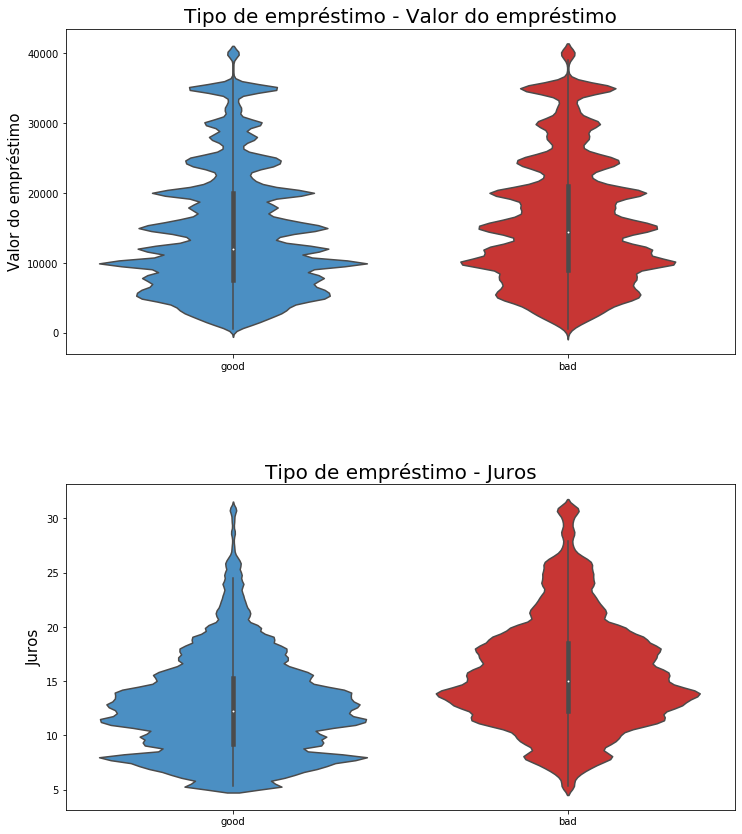

In [7]:
plt.figure(figsize = (12,14))
palette = ["#3791D7", "#E01E1B"]
plt.subplot(211)
g = sns.violinplot(x="loan_type", y="loan_amnt",data=df, 
            palette=palette)
g.set_title("Tipo de empréstimo - Valor do empréstimo", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Valor do empréstimo", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="loan_type", y="int_rate",data=df,
               palette=palette)
g1.set_title("Tipo de empréstimo - Juros", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Juros", fontsize=15)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()